## Importing libraries & data

In [27]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [28]:
# importing country relatioship data

relationship_df = pd.read_csv(r"C:/Users/Drew/20th_century/country_relationship_count.csv") 

In [29]:
relationship_df

,source,target,interaction_count
0,France,Russia,12
1,Germany,Russia,30
2,Austria,Germany,18
3,Austria,Hungary,6
4,Bulgaria,Hungary,6
...,...,...,...
108,Africa,Philippines,3
109,Afghanistan,Africa,10
110,Romania,Russia,6
111,North Korea,Russia,5


In [30]:
# creating a network object for a graph representing the relationship of countries during the 20th century events.
# the code will connect the countries as nodes and their number of interactions/relationship as edges.

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "interaction_count", 
                            create_using = nx.Graph())

## Using Networkx to graph visualization of country relationship

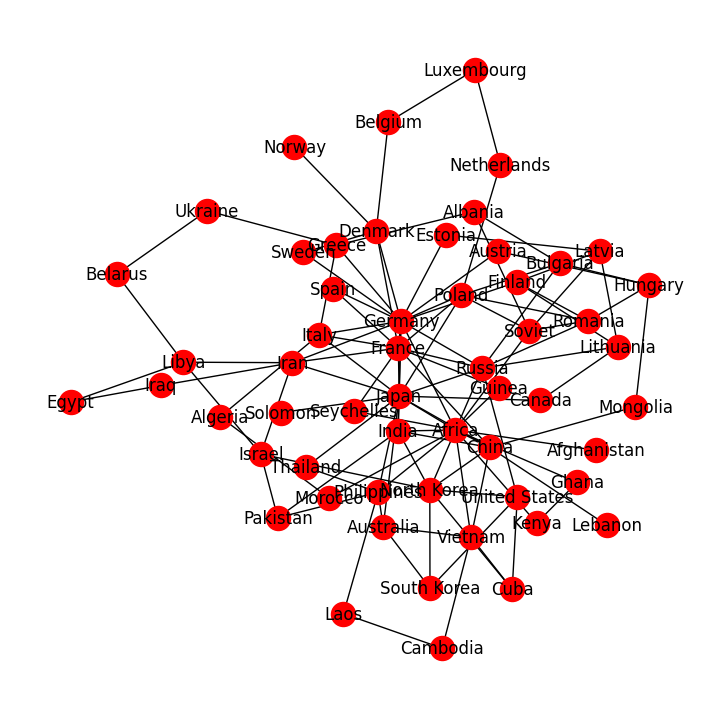

In [31]:
# creating visual representation of the interactins/relationships between countries of 20th century events.
# red nodes represent the countries, while the black line show their connections.

h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [32]:
h.savefig(r'C:/Users/Drew/20th_century/networkx_plt_country.png')

## Using Pyvis to graph visualization of country relationships

In [33]:
# creating an interactive network visualization.
# the node sizes have been based on the degree of centrality, which is how many direct connections a country has in the network.

# defining net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# defining nodes from the G object
node_degree = dict(G.degree)

# setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Using Leiden algorithm for community detection

In [34]:
# applying the leiden algorithm to the graph G that was created prior.
# this will partition the network of country nodes into clusters based on their relationships.

from cdlib import algorithms
coms = algorithms.leiden(G)

In [35]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [36]:
# converting the communit detection result to where each country is assigned to a specific cluster community.

new_com = coms.to_node_community_map()

In [37]:
# showing the assigned country cluster community list

new_com

defaultdict(list,
            {'Japan': [0],
             'China': [0],
             'Thailand': [0],
             'Philippines': [0],
             'Australia': [0],
             'Solomon': [0],
             'India': [0],
             'Pakistan': [0],
             'Laos': [0],
             'Cambodia': [0],
             'Vietnam': [0],
             'Lebanon': [0],
             'France': [1],
             'Germany': [1],
             'Italy': [1],
             'Spain': [1],
             'Poland': [1],
             'Netherlands': [1],
             'Luxembourg': [1],
             'Belgium': [1],
             'Denmark': [1],
             'Norway': [1],
             'Sweden': [1],
             'Africa': [2],
             'Morocco': [2],
             'Algeria': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Seychelles': [2],
             'Guinea': [2],
             'Afghanistan': [2],
             'Soviet': [3],
             'Estonia': [3],
             'Latvia': [3]

In [38]:
# creating the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [39]:
dict_com

{'Japan': 0,
 'China': 0,
 'Thailand': 0,
 'Philippines': 0,
 'Australia': 0,
 'Solomon': 0,
 'India': 0,
 'Pakistan': 0,
 'Laos': 0,
 'Cambodia': 0,
 'Vietnam': 0,
 'Lebanon': 0,
 'France': 1,
 'Germany': 1,
 'Italy': 1,
 'Spain': 1,
 'Poland': 1,
 'Netherlands': 1,
 'Luxembourg': 1,
 'Belgium': 1,
 'Denmark': 1,
 'Norway': 1,
 'Sweden': 1,
 'Africa': 2,
 'Morocco': 2,
 'Algeria': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Seychelles': 2,
 'Guinea': 2,
 'Afghanistan': 2,
 'Soviet': 3,
 'Estonia': 3,
 'Latvia': 3,
 'Lithuania': 3,
 'Finland': 3,
 'Romania': 3,
 'Canada': 3,
 'Austria': 4,
 'Hungary': 4,
 'Bulgaria': 4,
 'Greece': 4,
 'Albania': 4,
 'Ukraine': 4,
 'Mongolia': 4,
 'Belarus': 5,
 'Libya': 5,
 'Egypt': 5,
 'Iraq': 5,
 'Iran': 5,
 'Israel': 5,
 'Russia': 6,
 'North Korea': 6,
 'Cuba': 6,
 'United States': 6,
 'South Korea': 6}

In [40]:
# creating an interactive network visualization with the cluster communities created.

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Leiden algorithm observation
    Color Code and Community Representation:
        Red: Represents countries involved in Cold War dynamics, focusing on rivalries between capitalist and  communist powers. The United States is prominently in this group, reflecting its central role in global events like the Korean and Vietnam Wars.
        Blue: Countries associated with World War II and post-war alliances, such as NATO members. The strong links between these countries reflect close military and political alliances during and after the war.
        Purple: These countries reflect post-colonial, non-aligned, or those involved in proxy conflicts during the Cold War era. This cluster shows those nations that became struggles between major powers or pursued independent policies.
        Yellow: Represents Eastern countries under Soviet influence. The dense connections in this group represent shared governance systems and geopolitical strategies from across Europe and parts of Asia.
        Green: These countries seem aligned with non-aligned movements or involved in regional conflicts. This cluster includes nations that navigated between Western and Soviet blocs, while maintaining a certain level of autonomy or regional influence.
    Partition and Historical Accuracy:
        The partition generally aligns with the major geopolitical shifts and alliances of the 20th century. It captures key elements such as World War II alliances (blue), Cold War conflicts (red, yellow, and purple), and the rise of non-aligned movements (green). The clusters reflect countries' alliances and rivalries, with some countries serving as bridges between clusters, indicating their involvement in multiple significant historical events (e.g., the United States and United Kingdom).

    Additional Conclusions About Community Connections:
        Cross-Community Relationships: The connections between red and blue (e.g., United States and United Kingdom) emphasize shared political and military interests despite different Cold War alignments.
        Non-Aligned Influence: Green countries seem to play a balancing role between the Eastern bloc (yellow) and Western blocs (blue/red). This reflects the non-aligned movements and the strategic importance of maintaining neutrality or independence during intense global polarization.
        Historical Consistency: The connections largely align with key historical events, such as World War II alliances, the establishment of NATO, and the global division during the Cold War. The visual separation and closenness of countries in different communities emphasize their historical ties and their importance in shaping global events.



## Most import countries during the 20th century events

### Degree centrality

In [41]:
# finding countries' degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.19999999999999998,
 'Russia': 0.14545454545454545,
 'Germany': 0.2727272727272727,
 'Austria': 0.03636363636363636,
 'Hungary': 0.07272727272727272,
 'Bulgaria': 0.07272727272727272,
 'Italy': 0.09090909090909091,
 'Spain': 0.03636363636363636,
 'Poland': 0.12727272727272726,
 'Soviet': 0.09090909090909091,
 'Estonia': 0.03636363636363636,
 'Latvia': 0.07272727272727272,
 'Lithuania': 0.07272727272727272,
 'Finland': 0.07272727272727272,
 'Netherlands': 0.03636363636363636,
 'Luxembourg': 0.03636363636363636,
 'Belgium': 0.03636363636363636,
 'Denmark': 0.09090909090909091,
 'Norway': 0.01818181818181818,
 'Sweden': 0.03636363636363636,
 'Greece': 0.07272727272727272,
 'Albania': 0.05454545454545454,
 'Ukraine': 0.03636363636363636,
 'Belarus': 0.03636363636363636,
 'Libya': 0.07272727272727272,
 'Egypt': 0.03636363636363636,
 'Iraq': 0.03636363636363636,
 'Iran': 0.10909090909090909,
 'Japan': 0.2545454545454545,
 'Africa': 0.23636363636363636,
 'Morocco': 0.0363636363636

In [42]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [43]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

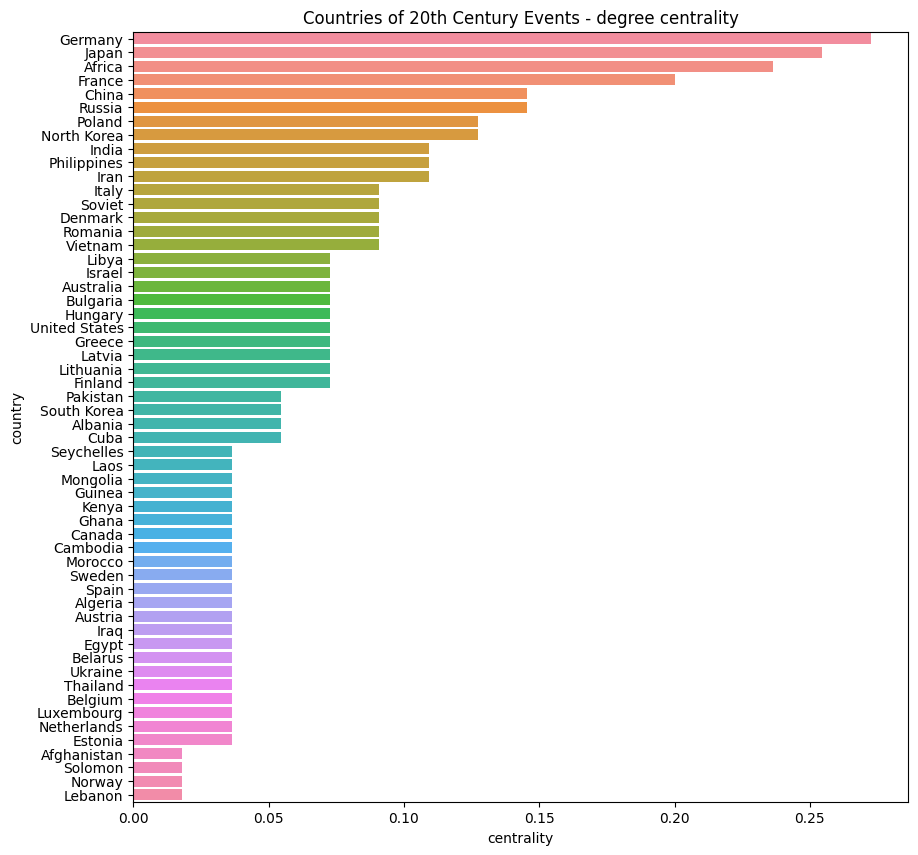

In [44]:
# Creating bar plot of country degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = degree_df).set_title("Countries of 20th Century Events - degree centrality")
plt.savefig(r'C:\Users\Drew\20th_century\degree_centrality_plot.png')

### Degree centrality observations
    Observation: Germany, Japan, and Africa exhibit the highest degree centrality values, highlighting their involvement in a vast number of direct associations with other countries throughout significant 20th-century events. These connections can be attributed to their pivotal roles in World War II, Cold War alignments, and post-colonial global movements. 
    The United States and United Kingdom, while major players, rank slightly lower in degree centrality, possibly due to their more concentrated alliances with influential partners during strategic events like the Cold War. This suggests that although the U.S. and U.K. had fewer connections, the partnerships they maintained were significant. The difference between these powers and Germany or Japan likely stems from broader geopolitical interactions these nations had across different regions, affecting their degree centrality.
    The graph's visual decline in degree centrality appears to follow a sectional, almost equal drop-off after the top-ranked countries like Germany, Japan, and Africa. Its steady like decline shows that countries appear to have a relatively balanced connection compared to the more prominent players, indicating a somewhat tiered network structure. The evenness of the drop likely reflects the consistent presence of countries that played less central roles but still maintained moderate global associations throughout the 20th century, leading to a structured, rather than abrupt, decline in degree centrality.

### Closeness Centrality

In [45]:
# finding the closeness centrality of the counties in 20th century events.
# Closeness centrality measures how close a node is to all other nodes,indicating how efficiently a country can reach other countries in terms of shortest paths.
# closeness_dict stores these centrality values for each country.

closeness_dict = nx.closeness_centrality(G)

In [46]:
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [47]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

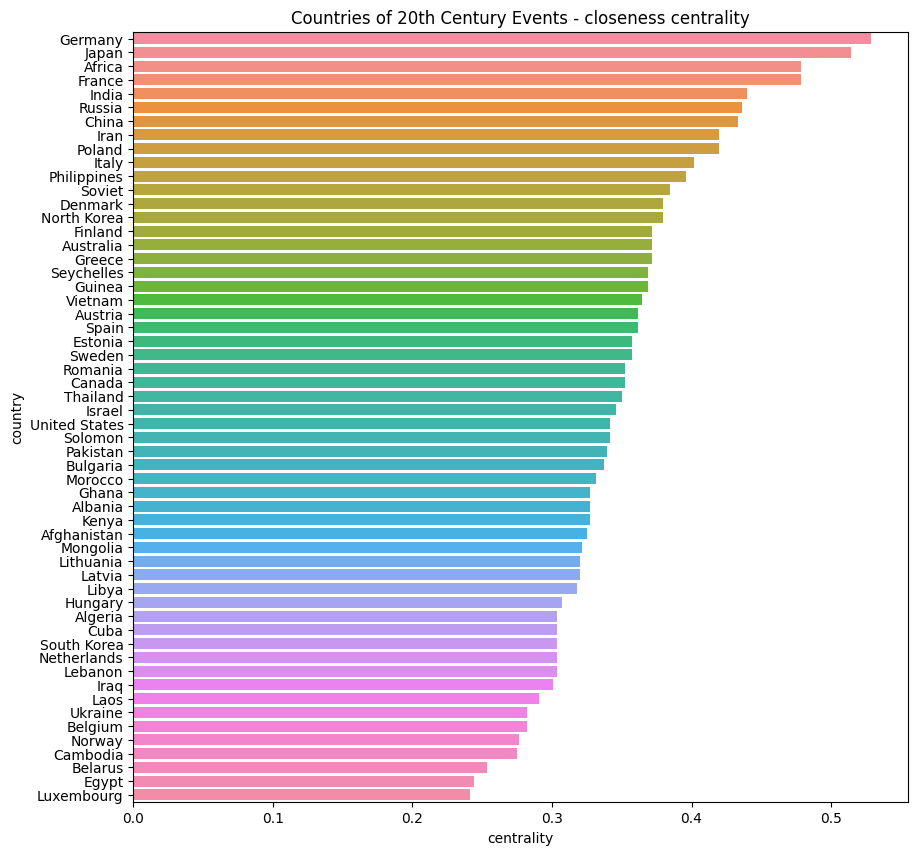

In [48]:
# Creating plot of country closeness centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = closeness_df).set_title("Countries of 20th Century Events - closeness centrality")
plt.savefig(r'C:\Users\Drew\20th_century\closeness_centrality_plot.png')

### Closeness centrality observation
    Observation:The high closeness centrality values of Germany, Japan, and Africa suggest they had the shortest and most direct paths to other nations in invovlements of 20th century events, reflecting their central roles in pivotal global events such as World War I, World War II, and post-colonial movements during the Cold War. After these top nations, closeness centrality values for other countries begin to stabilize around 0.3-0.4, indicating more balanced global interactions across various regions. However, as we approach countries like Iraq, we notice a significant drop in centrality, indicating fewer or less direct connections with other nations, possibly due to regional isolation or less involvement in broader geopolitical activities during the 20th century.
    Countries with higher closeness centrality likely had greater access to global networks, participating in key negotiations, military alliances, and economic treaties, while nations with lower scores may have been more regionally focused or isolated by global standards during this period. The decline in closeness centrality seems to follow a gradual and steady pattern There is a leveling-off around the 0.3-0.4 range for most other countries, showing a more balanced distribution. This uniformity indicates a cohesive middle group of nations with moderate global interactions, while the decline seen in countries like Iraq represents more isolated or peripheral nations with fewer direct or shorter paths to others.

### Betweenness Centrality

In [49]:
# finding the betweenness centrality for each country in the network of 20th-century events.
# measures how often a country lies on the shortest path between other countries, indicating its role as a bridge or connection during 20th-century events.
# high betweenness means the country acts more frequently as a bridge/connection between other countries in the network.
# betweenness_dict stores the results for graph creation.

betweenness_dict = nx.betweenness_centrality(G)

In [50]:
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [51]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

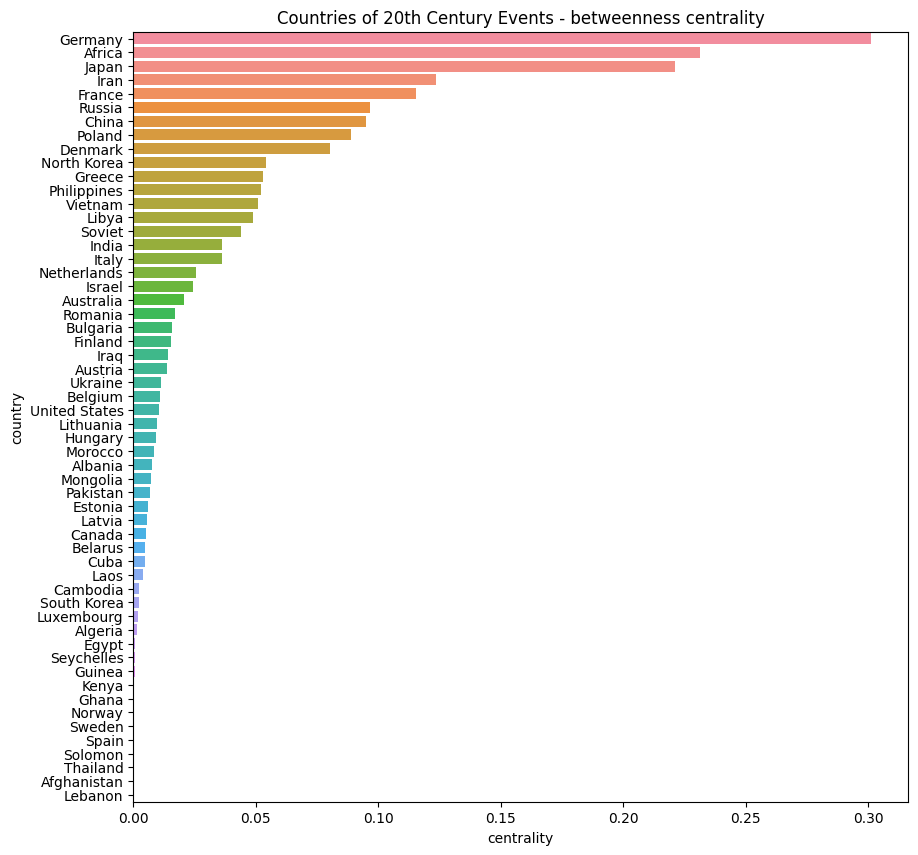

In [52]:
# Creating plot of country betweenness centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = betweennes_df).set_title("Countries of 20th Century Events - betweenness centrality")
plt.savefig(r'C:\Users\Drew\20th_century\betweenness_centrality_plot.png')

### Betweenness centrality observations
    Observation: For betweenness centrality, the graph shows Germany, Africa, and Japan having the highest betweenness centrality. Germany with the highest value aligns with its pivotal role in both global conflicts in World War I and II and its post-war recovery, making it a key player in connecting various nations across Europe. Africa also ranks high due to its post-colonial significance during the Cold War, bridging Eastern and Western blocs while emerging as a geopolitical focal point. Japan stands out for its involvement in both before and after World War II events, especially in Asia, facilitating connections between major powers like the U.S. and other Asian countries. 
    Beyond these top three, France and Iran also play notable roles that reflects their participation in major 20th century events, ranging from decolonization to conflicts that required diplomatic involvements. This pattern suggests that nations with high betweenness centrality were often intermediaries in conflicts, trade, or diplomacy, effectively shaping the global geopolitical landscape by linking distant powers and influencing international relations.
    The graph for betweenness centrality shows a more pronounced and uneven decline compared to the other centrality graphs. Germany, Africa, and Japan stand out sharply at the top, with a steep decline afterward, indicating that only a few countries acted as major bridges or intermediaries during key 20th century events. Below these, there is a more gradual but significant drop, particularly past the top ten countries. This highlights that beyond the most central nations, many others had a more limited role in connecting or influencing the broader network.